In [2]:
import pandas as pd
import re

In [70]:
data=pd.read_excel('Train_Data.xlsx')

In [71]:
data['text']

0       Conning Builds Strong Case for Portfolio #Dive...
1       1943: Poland - work party prisoners in the Naz...
2       Police walk up on me I be blowin smoke in dey ...
3       Well as I was chaning an iPad screen it fuckin...
4       78 passengers evacuated safely after Green Lin...
                              ...                        
7608    Latest : Trains derailment: 'It's the freakies...
7609    Vinnie Jones goes on the beat with Northumbria...
7610    Never fear quarrels but seek hazardous adventu...
7611    #PlayingNow #BLOODBOUND Seven Angels Media Str...
7612    Real people. True stories. Real pain &amp; suf...
Name: text, Length: 7613, dtype: object

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fx.chen.2021\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fx.chen.2021\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
# Text Cleaning 
def clean_text(text):
    # Remove URLs, special characters and mentions
    text = ' '.join(word for word in text.split() if not word.startswith('http') and not word.startswith('@'))
    # Remove hashtags while keeping the words following hashtags
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove amp
    text = text.replace('amp', '')
    #remove non-ASCII characters using regex
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    return text

# Step 2: Apply the clean_text function to the 'tweets' column using apply
data['cleaned_tweets'] = data['text'].apply(clean_text)

print(data['cleaned_tweets'])

0       Conning Builds Strong Case for Portfolio Diver...
1       1943 Poland  work party prisoners in the Nazi ...
2       Police walk up on me I be blowin smoke in dey ...
3       Well as I was chaning an iPad screen it fuckin...
4       78 passengers evacuated safely after Green Lin...
                              ...                        
7608    Latest  Trains derailment Its the freakiest of...
7609    Vinnie Jones goes on the beat with Northumbria...
7610    Never fear quarrels but seek hazardous adventures
7611      PlayingNow BLOODBOUND Seven Angels Media Stream
7612    Real people True stories Real pain  suffering ...
Name: cleaned_tweets, Length: 7613, dtype: object


In [76]:
# Lowercasing
data['cleaned_tweets'] = data['cleaned_tweets'].str.lower()

print(data['cleaned_tweets'])

0       conning builds strong case for portfolio diver...
1       1943 poland  work party prisoners in the nazi ...
2       police walk up on me i be blowin smoke in dey ...
3       well as i was chaning an ipad screen it fuckin...
4       78 passengers evacuated safely after green lin...
                              ...                        
7608    latest  trains derailment its the freakiest of...
7609    vinnie jones goes on the beat with northumbria...
7610    never fear quarrels but seek hazardous adventures
7611      playingnow bloodbound seven angels media stream
7612    real people true stories real pain  suffering ...
Name: cleaned_tweets, Length: 7613, dtype: object


In [78]:
# Tokenizing

data['tokenized_tweets'] = data['cleaned_tweets'].apply(word_tokenize)

print(data['tokenized_tweets'])

0       [conning, builds, strong, case, for, portfolio...
1       [1943, poland, work, party, prisoners, in, the...
2       [police, walk, up, on, me, i, be, blowin, smok...
3       [well, as, i, was, chaning, an, ipad, screen, ...
4       [78, passengers, evacuated, safely, after, gre...
                              ...                        
7608    [latest, trains, derailment, its, the, freakie...
7609    [vinnie, jones, goes, on, the, beat, with, nor...
7610    [never, fear, quarrels, but, seek, hazardous, ...
7611    [playingnow, bloodbound, seven, angels, media,...
7612    [real, people, true, stories, real, pain, suff...
Name: tokenized_tweets, Length: 7613, dtype: object


In [79]:
#Remove stopwords
stop_words = set(stopwords.words('english'))
data['filtered_tweets'] = data['tokenized_tweets'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

print(data['filtered_tweets'])

0       [conning, builds, strong, case, portfolio, div...
1       [1943, poland, work, party, prisoners, nazi, d...
2       [police, walk, blowin, smoke, dey, face, wan, ...
3       [well, chaning, ipad, screen, fucking, explode...
4       [78, passengers, evacuated, safely, green, lin...
                              ...                        
7608    [latest, trains, derailment, freakiest, freak,...
7609     [vinnie, jones, goes, beat, northumbria, police]
7610    [never, fear, quarrels, seek, hazardous, adven...
7611    [playingnow, bloodbound, seven, angels, media,...
7612    [real, people, true, stories, real, pain, suff...
Name: filtered_tweets, Length: 7613, dtype: object


In [80]:
# Stemming
# Initialize Porter Stemmer from NLTK
stemmer = PorterStemmer()

data['stemmed_tweets'] = data['filtered_tweets'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

print(data['stemmed_tweets'])

0       [con, build, strong, case, portfolio, diversif...
1       [1943, poland, work, parti, prison, nazi, deat...
2       [polic, walk, blowin, smoke, dey, face, wan, n...
3       [well, chane, ipad, screen, fuck, explod, glas...
4       [78, passeng, evacu, safe, green, line, train,...
                              ...                        
7608    [latest, train, derail, freakiest, freak, acci...
7609         [vinni, jone, goe, beat, northumbria, polic]
7610       [never, fear, quarrel, seek, hazard, adventur]
7611    [playingnow, bloodbound, seven, angel, media, ...
7612    [real, peopl, true, stori, real, pain, suffer,...
Name: stemmed_tweets, Length: 7613, dtype: object


In [81]:
#SentiWordNet

from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

# Function to get the sentiment score of a word using SentiWordNet
def get_sentiment_score(word):
    synsets = list(swn.senti_synsets(word))
    if synsets:
        sentiment = synsets[0]
        return sentiment.pos_score() - sentiment.neg_score()
    else:
        return 0

# Function to calculate sentiment score for a list of stemmed words
def calculate_sentiment_score(stemmed_words):
    sentiment_scores = [get_sentiment_score(stemmer.stem(word)) for word in stemmed_words]
    total_sentiment = sum(sentiment_scores)
    return total_sentiment

# Apply sentiment analysis to the 'stemmed_tweets' column
data['sentiment_score'] = data['stemmed_tweets'].apply(calculate_sentiment_score)

# Now, df['sentiment_score'] contains the sentiment scores for each row
print(data['sentiment_score'])

0       0.500
1       0.000
2       0.000
3       0.500
4       0.625
        ...  
7608   -0.375
7609    0.000
7610   -1.875
7611    0.000
7612   -0.250
Name: sentiment_score, Length: 7613, dtype: float64


In [82]:
#Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to join the lists of words into sentences and get compound sentiment score using VADER
def get_sentiment_score_vader(stemmed_words):
    sentence = ' '.join(stemmed_words)
    sentiment = analyzer.polarity_scores(sentence)
    return sentiment['compound']

# Extract compound sentiment scores
data['compound_sentiment'] = data['stemmed_tweets'].apply(get_sentiment_score_vader)

print(data['compound_sentiment'])

0       0.5106
1      -0.8807
2      -0.5574
3       0.0258
4       0.1779
         ...  
7608   -0.7717
7609    0.0000
7610    0.3875
7611    0.0000
7612   -0.6124
Name: compound_sentiment, Length: 7613, dtype: float64


In [83]:
data.to_excel('data_with_sentiment_scores.xlsx')

In [3]:
df=pd.read_excel('data_with_sentiment_scores.xlsx')

In [85]:
df['sentiment_score'].describe()

count    7613.000000
mean       -0.035700
std         0.439862
min        -9.750000
25%        -0.250000
50%         0.000000
75%         0.125000
max         2.500000
Name: sentiment_score, dtype: float64

In [86]:
df['compound_sentiment'].describe()

count    7613.000000
mean       -0.113734
std         0.406361
min        -0.987900
25%        -0.458800
50%         0.000000
75%         0.000000
max         0.968200
Name: compound_sentiment, dtype: float64

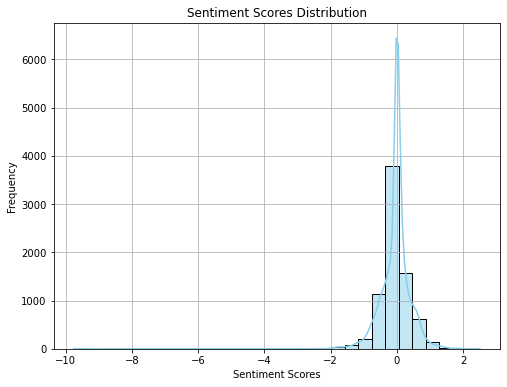

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

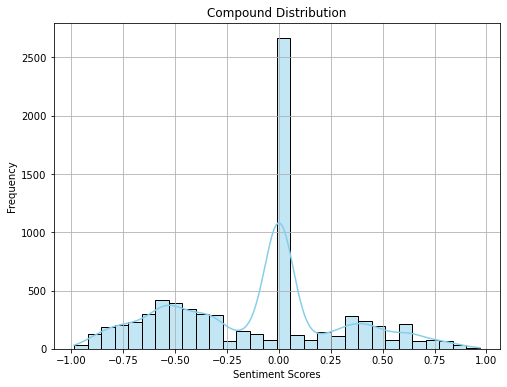

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(df['compound_sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Compound Distribution')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [89]:
from wordcloud import WordCloud

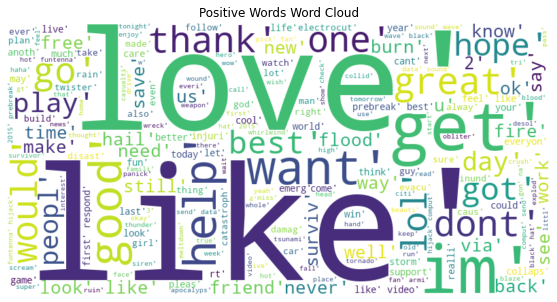

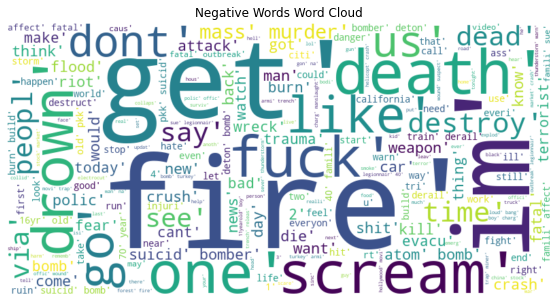

In [90]:
#Check wordcloud
# Filter positive and negative words based on sentiment scores
positive_words = ' '.join(df[df['compound_sentiment'] > 0]['stemmed_tweets'])
negative_words = ' '.join(df[df['compound_sentiment'] < 0]['stemmed_tweets'])

# Generate word clouds for positive and negative words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words Word Cloud')
plt.show()

# Plot negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words Word Cloud')
plt.show()

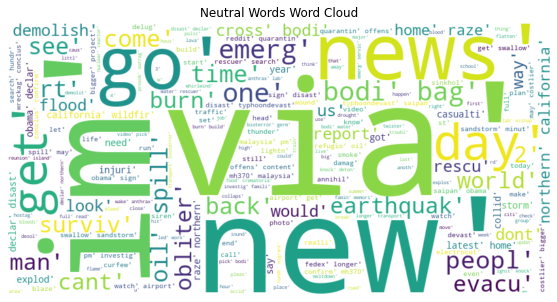

In [91]:
# Filter positive and negative words based on sentiment scores
neutral_words = ' '.join(df[df['compound_sentiment'] == 0]['stemmed_tweets'])

# Generate word clouds for neutral words
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)

# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Words Word Cloud')
plt.show()

In [92]:
# Get the words inside the negative_wordcloud
words_inside_wordcloud = negative_wordcloud.words_

# Print the words
for word, frequency in words_inside_wordcloud.items():
    print(f'{word}: {frequency}')

fire': 1.0
get': 0.7289156626506024
im': 0.6746987951807228
death': 0.5843373493975904
one': 0.5481927710843374
scream': 0.536144578313253
drown': 0.5120481927710844
fuck': 0.5
like': 0.4939759036144578
go': 0.4759036144578313
dont': 0.43373493975903615
us': 0.43373493975903615
destroy': 0.42771084337349397
time': 0.42168674698795183
peopl': 0.41566265060240964
via': 0.39156626506024095
dead': 0.3855421686746988
say': 0.3795180722891566
see': 0.3614457831325301
mass' murder': 0.35542168674698793
suicid' bomber': 0.35542168674698793
car': 0.3433734939759036
weapon': 0.3313253012048193
riot': 0.3253012048192771
new': 0.3192771084337349
shit': 0.3072289156626506
attack': 0.3072289156626506
atom' bomb': 0.30120481927710846
would': 0.29518072289156627
fatal': 0.2891566265060241
flood': 0.2891566265060241
know': 0.2891566265060241
crush': 0.2891566265060241
back': 0.28313253012048195
kill': 0.28313253012048195
think': 0.28313253012048195
man': 0.27710843373493976
die': 0.27710843373493976
po

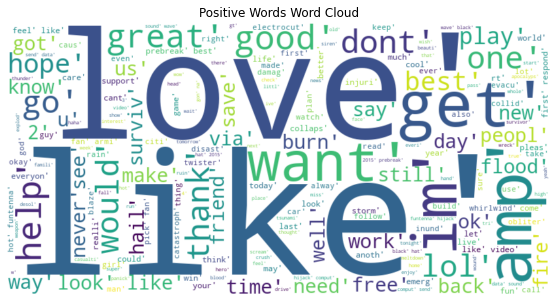

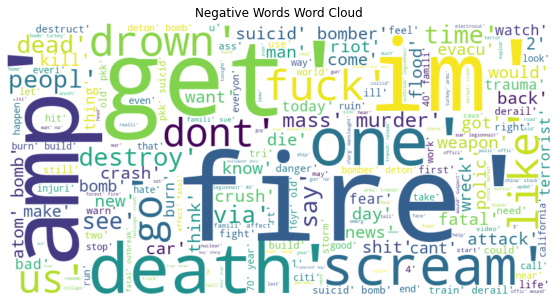

In [66]:
#Check wordcloud for SentiWordNet
# Filter positive and negative words based on sentiment scores
positive_words_wn = ' '.join(df[df['sentiment_score'] > 0]['stemmed_tweets'])
negative_words_wn = ' '.join(df[df['sentiment_score'] < 0]['stemmed_tweets'])

# Generate word clouds for positive and negative words
positive_wordcloud_wn = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
negative_wordcloud_wn = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud_wn, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words Word Cloud')
plt.show()

# Plot negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud_wn, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words Word Cloud')
plt.show()

In [93]:
# Get the words inside the negative_wordcloud
words_inside_wordcloud_wn = negative_wordcloud_wn.words_

# Print the words
for word, frequency in words_inside_wordcloud_wn.items():
    print(f'{word}: {frequency}')

fire': 1.0
get': 0.7289156626506024
im': 0.6746987951807228
amp': 0.6566265060240963
death': 0.5843373493975904
one': 0.5481927710843374
scream': 0.536144578313253
drown': 0.5120481927710844
fuck': 0.5
like': 0.4939759036144578
go': 0.4759036144578313
dont': 0.43373493975903615
us': 0.43373493975903615
destroy': 0.42771084337349397
time': 0.42168674698795183
peopl': 0.40963855421686746
via': 0.39156626506024095
dead': 0.3855421686746988
say': 0.3795180722891566
see': 0.3614457831325301
mass' murder': 0.35542168674698793
suicid' bomber': 0.35542168674698793
car': 0.3433734939759036
weapon': 0.3313253012048193
flood': 0.3253012048192771
new': 0.3192771084337349
riot': 0.3192771084337349
shit': 0.3072289156626506
attack': 0.3072289156626506
atom' bomb': 0.30120481927710846
would': 0.29518072289156627
fatal': 0.2891566265060241
know': 0.2891566265060241
crush': 0.2891566265060241
back': 0.28313253012048195
kill': 0.28313253012048195
think': 0.28313253012048195
news': 0.28313253012048195
ma

In [8]:
from gensim import corpora
final_tweets = df['stemmed_tweets']
# Tokenize the strings using NLTK
tokenized_tweets = [nltk.word_tokenize(tweet) for tweet in final_tweets]

# construct vocabulary
vocab = corpora.Dictionary(tokenized_tweets)

print("Size of vocab: ", len(vocab))
vocab.filter_extremes(no_below = 1, no_above = 0.35)
bow = [vocab.doc2bow(doc) for doc in tokenized_tweets]

Size of vocab:  12410


In [33]:
from gensim import models

# build the model
n_topic = 9
lda = models.LdaModel(bow, id2word = vocab, num_topics = n_topic, random_state=5)

In [34]:
print("Topics")
for i in range(n_topic):
    print(i, ':', lda.print_topic(i, topn = 5))

Topics
0 : 0.009*"'new" + 0.007*"'debri" + 0.006*"'polic" + 0.006*"'accid" + 0.006*"'quarantin"
1 : 0.013*"'get" + 0.011*"'fire" + 0.008*"'scream" + 0.008*"'dont" + 0.008*"'evacu"
2 : 0.014*"'suicid" + 0.013*"'famili" + 0.013*"'bag" + 0.011*"'bodi" + 0.010*"'bomb"
3 : 0.012*"'disast" + 0.008*"'bomb" + 0.007*"'crash" + 0.007*"'obama" + 0.007*"'deton"
4 : 0.012*"'like" + 0.011*"'home" + 0.010*"'california" + 0.008*"'dead" + 0.008*"'love"
5 : 0.009*"'via" + 0.008*"'wave" + 0.008*"'na" + 0.007*"'fire" + 0.006*"'im"
6 : 0.018*"'im" + 0.009*"2" + 0.008*"'flood" + 0.006*"'attack" + 0.006*"'fire"
7 : 0.012*"'like" + 0.009*"'emerg" + 0.007*"'one" + 0.007*"'death" + 0.006*"'look"
8 : 0.010*"'train" + 0.008*"'derail" + 0.008*"'wreck" + 0.008*"'storm" + 0.007*"'like"


In [14]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tokenized_tweets, dictionary=vocab, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3879220163405912


In [23]:
from gensim.models import CoherenceModel
scores=dict()
for i in range(1,20):
    n_topic = i
    lda = models.LdaModel(bow, id2word = vocab, num_topics = n_topic, random_state=5)
    coherence_model_lda = CoherenceModel(model=lda, texts=tokenized_tweets, dictionary=vocab, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    scores[i]=coherence_lda
    print(scores)

{1: 0.19366833116529986}
{1: 0.19366833116529986, 2: 0.28647142086468624}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697, 5: 0.4030475513402279}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697, 5: 0.4030475513402279, 6: 0.38586564759813724}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697, 5: 0.4030475513402279, 6: 0.38586564759813724, 7: 0.3736616076596984}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697, 5: 0.4030475513402279, 6: 0.38586564759813724, 7: 0.3736616076596984, 8: 0.3968949090349885}
{1: 0.19366833116529986, 2: 0.28647142086468624, 3: 0.28676658775698743, 4: 0.33950940814048697, 5: 0.4030475513402279, 6: 0.3858656475

In [24]:
sorted_scores={k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

In [25]:
sorted_scores

{1: 0.19366833116529986,
 2: 0.28647142086468624,
 3: 0.28676658775698743,
 4: 0.33950940814048697,
 7: 0.3736616076596984,
 6: 0.38586564759813724,
 10: 0.3879220163405912,
 8: 0.3968949090349885,
 12: 0.39707439713495235,
 9: 0.402226042041145,
 5: 0.4030475513402279,
 19: 0.40576782314980175,
 17: 0.4061113206996771,
 13: 0.4077360914384061,
 14: 0.41214286524998683,
 16: 0.42437028804879784,
 15: 0.4284293074996736,
 18: 0.44136414663765317,
 11: 0.4432565471452566}

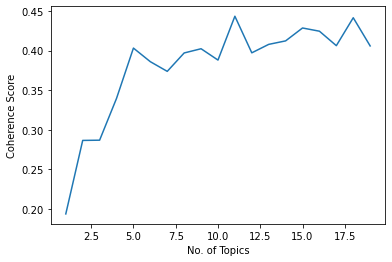

In [35]:
# Define the dictionary
data = sorted_scores 

# Convert the dictionary to a list of tuples
data_list = list(data.items())

# Sort the list by key (optional)
data_list.sort()

# Extract the x and y values from the list
x, y = zip(*data_list)

# Create a bar chart
plt.plot(x, y)

# Set the x-axis label
plt.xlabel("No. of Topics")

# Set the y-axis label
plt.ylabel("Coherence Score")

# Show the plot
plt.show()

In [37]:
#11 is chosen
n_topic = 11
lda = models.LdaModel(bow, id2word = vocab, num_topics = n_topic , random_state=5)
print("Topics")
for i in range(n_topic):
    print(i, ':', lda.print_topic(i, topn = 5))

Topics
0 : 0.015*"'disast" + 0.015*"'crash" + 0.010*"'new" + 0.009*"'quarantin" + 0.008*"'reddit"
1 : 0.010*"'get" + 0.010*"'evacu" + 0.009*"'dont" + 0.009*"'murder" + 0.008*"'terror"
2 : 0.014*"'famili" + 0.011*"'armi" + 0.010*"'legionnair" + 0.009*"'suicid" + 0.009*"'bomb"
3 : 0.010*"u" + 0.008*"'deton" + 0.007*"'light" + 0.006*"'flood" + 0.006*"'work"
4 : 0.011*"'like" + 0.009*"'fire" + 0.009*"'polic" + 0.009*"'love" + 0.008*"'suspect"
5 : 0.012*"'fire" + 0.008*"'wave" + 0.008*"'like" + 0.007*"'via" + 0.007*"'bag"
6 : 0.021*"'im" + 0.009*"'flood" + 0.008*"'trauma" + 0.007*"'build" + 0.006*"'school"
7 : 0.014*"'like" + 0.009*"'electrocut" + 0.009*"'video" + 0.006*"'great" + 0.006*"'kill"
8 : 0.015*"'storm" + 0.012*"'us" + 0.011*"'like" + 0.010*"'train" + 0.009*"'drown"
9 : 0.012*"'get" + 0.007*"'attack" + 0.007*"'watch" + 0.007*"'polic" + 0.007*"'one"
10 : 0.012*"'bomb" + 0.009*"'scream" + 0.008*"'hiroshima" + 0.008*"'home" + 0.007*"'bioterror"


In [39]:
lda_topics=[lda[bow[i]] for i in range(len(tokenized_tweets))]

In [42]:
df['topics']=lda_topics

In [44]:
df.head(5)

,Unnamed: 0,id,keyword,location,text,target,shuffle,cleaned_tweets,tokenized_tweets,filtered_tweets,stemmed_tweets,sentiment_score,compound_sentiment,topics
0,0,2096,casualty,Hartford London Hong Kong,Conning Builds Strong Case for Portfolio #Dive...,0,0.628237,conning builds strong case for portfolio diver...,"['conning', 'builds', 'strong', 'case', 'for',...","['conning', 'builds', 'strong', 'case', 'portf...","['con', 'build', 'strong', 'case', 'portfolio'...",0.500,0.5106,"[(0, 0.010151028), (1, 0.8085807), (2, 0.01015..."
1,1,1816,buildings%20on%20fire,World Wide,1943: Poland - work party prisoners in the Naz...,1,0.957220,1943 poland work party prisoners in the nazi ...,"['1943', 'poland', 'work', 'party', 'prisoners...","['1943', 'poland', 'work', 'party', 'prisoners...","['1943', 'poland', 'work', 'parti', 'prison', ...",0.000,-0.8807,"[(4, 0.06848594), (7, 0.88584805)]"
2,2,7783,police,NaN,Police walk up on me I be blowin smoke in dey ...,0,0.342144,police walk up on me i be blowin smoke in dey ...,"['police', 'walk', 'up', 'on', 'me', 'i', 'be'...","['police', 'walk', 'blowin', 'smoke', 'dey', '...","['polic', 'walk', 'blowin', 'smoke', 'dey', 'f...",0.000,-0.5574,"[(4, 0.2947796), (5, 0.5720312), (10, 0.084511..."
3,3,4920,exploded,"Elmwood Park, NJ",Well as I was chaning an iPad screen it fuckin...,0,0.782503,well as i was chaning an ipad screen it fuckin...,"['well', 'as', 'i', 'was', 'chaning', 'an', 'i...","['well', 'chaning', 'ipad', 'screen', 'fucking...","['well', 'chane', 'ipad', 'screen', 'fuck', 'e...",0.500,0.0258,"[(0, 0.10133471), (1, 0.44864345), (4, 0.09669..."
4,4,4791,evacuated,"Chicago, but Philly is home",78 passengers evacuated safely after Green Lin...,1,0.078023,78 passengers evacuated safely after green lin...,"['78', 'passengers', 'evacuated', 'safely', 'a...","['78', 'passengers', 'evacuated', 'safely', 'g...","['78', 'passeng', 'evacu', 'safe', 'green', 'l...",0.625,0.1779,"[(0, 0.010104429), (1, 0.010105841), (2, 0.010..."


In [46]:
def extract_top_topic(topics_list):
    topk=0
    top_prob=0
    for k,v in topics_list:
        if v>top_prob:
            topk=k
            top_prob=v
    return topk

In [47]:
df['chosen_topic']=df['topics'].apply(extract_top_topic)

In [50]:
df.head(5)

,Unnamed: 0,id,keyword,location,text,target,shuffle,cleaned_tweets,tokenized_tweets,filtered_tweets,stemmed_tweets,sentiment_score,compound_sentiment,topics,chosen_topic
0,0,2096,casualty,Hartford London Hong Kong,Conning Builds Strong Case for Portfolio #Dive...,0,0.628237,conning builds strong case for portfolio diver...,"['conning', 'builds', 'strong', 'case', 'for',...","['conning', 'builds', 'strong', 'case', 'portf...","['con', 'build', 'strong', 'case', 'portfolio'...",0.500,0.5106,"[(0, 0.010151028), (1, 0.8085807), (2, 0.01015...",1
1,1,1816,buildings%20on%20fire,World Wide,1943: Poland - work party prisoners in the Naz...,1,0.957220,1943 poland work party prisoners in the nazi ...,"['1943', 'poland', 'work', 'party', 'prisoners...","['1943', 'poland', 'work', 'party', 'prisoners...","['1943', 'poland', 'work', 'parti', 'prison', ...",0.000,-0.8807,"[(4, 0.06848594), (7, 0.88584805)]",7
2,2,7783,police,NaN,Police walk up on me I be blowin smoke in dey ...,0,0.342144,police walk up on me i be blowin smoke in dey ...,"['police', 'walk', 'up', 'on', 'me', 'i', 'be'...","['police', 'walk', 'blowin', 'smoke', 'dey', '...","['polic', 'walk', 'blowin', 'smoke', 'dey', 'f...",0.000,-0.5574,"[(4, 0.2947796), (5, 0.5720312), (10, 0.084511...",5
3,3,4920,exploded,"Elmwood Park, NJ",Well as I was chaning an iPad screen it fuckin...,0,0.782503,well as i was chaning an ipad screen it fuckin...,"['well', 'as', 'i', 'was', 'chaning', 'an', 'i...","['well', 'chaning', 'ipad', 'screen', 'fucking...","['well', 'chane', 'ipad', 'screen', 'fuck', 'e...",0.500,0.0258,"[(0, 0.10133471), (1, 0.44864345), (4, 0.09669...",1
4,4,4791,evacuated,"Chicago, but Philly is home",78 passengers evacuated safely after Green Lin...,1,0.078023,78 passengers evacuated safely after green lin...,"['78', 'passengers', 'evacuated', 'safely', 'a...","['78', 'passengers', 'evacuated', 'safely', 'g...","['78', 'passeng', 'evacu', 'safe', 'green', 'l...",0.625,0.1779,"[(0, 0.010104429), (1, 0.010105841), (2, 0.010...",9


In [51]:
df.to_excel('topic_model_11.xlsx')